## 볼린저 밴드 투자전략

1. 파일로드
2. 결측치와 이상치를 확인 및 제거
3. 시간과 종가만의 데이터를 가지고 데이터프레임 생성
4. 이동평균선 : 데이터 20개의 평균을 구해서 새로운 파생변수 생성
5. 상단밴드 : 이동평균선 + (2 * 데이터 20개의 표준편차)
6. 하단밴드 : 이동평균선 + (2 * 데이터 20개의 표준편차)
7. 구매상태를 확인하는 파생변수 생성
8. 구매상태를 입력
9. 수익률 계산

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../csv/AMZN.csv', index_col= 'Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [3]:
# 결측치 확인
df.isna().sum()  

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
# 결측치와 이상치(무한대, 음의 무한대)를 확인
df.isin([np.nan, np.inf, -np.inf]).sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
# 인덱스("1")를 기준으로 결측치/이상치를 True/False로 출력
df.isin([np.nan, np.inf, -np.inf]).any(1)  

C:\Users\ezen\AppData\Local\Temp\ipykernel_7528\2039351929.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df.isin([np.nan, np.inf, -np.inf]).any(1)


Date
1997-05-15    False
1997-05-16    False
1997-05-19    False
1997-05-20    False
1997-05-21    False
              ...  
2019-06-18    False
2019-06-19    False
2019-06-20    False
2019-06-21    False
2019-06-24    False
Length: 5563, dtype: bool

In [6]:
#  # 인덱스("1")를 기준으로 결측치/이상치 존재하면 데이터를 출력
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]  

C:\Users\ezen\AppData\Local\Temp\ipykernel_7528\3996665038.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df[df.isin([np.nan, np.inf, -np.inf]).any(1)]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [7]:
#인덱스("1")를 기준으로 결측치/이상치를 제외하고 데이터를 출력
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]  
df.head()

C:\Users\ezen\AppData\Local\Temp\ipykernel_7528\2845884575.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [8]:
# case1
df[['Adj Close']] # [] 하나는 시리즈 형태, [[]]는 리스트 형태
# case2
price_df = df.loc[:,['Adj Close']]
price_df.head()

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


In [9]:
# 이동 평균선
# 데이터 20개의 평균값
# 현재 날짜에서 과거 20일치의 데이터의 평균
price_df['Adj Close'].rolling(20).mean()


Date
1997-05-15            NaN
1997-05-16            NaN
1997-05-19            NaN
1997-05-20            NaN
1997-05-21            NaN
                 ...     
2019-06-18    1821.456500
2019-06-19    1824.020001
2019-06-20    1826.945495
2019-06-21    1831.736499
2019-06-24    1835.970190
Name: Adj Close, Length: 5563, dtype: float64

In [10]:
price_df['Center'] = price_df['Adj Close'].rolling(20).mean()
price_df


,Adj Close,Center
Date,,
1997-05-15,1.958333,NaN
1997-05-16,1.729167,NaN
1997-05-19,1.708333,NaN
1997-05-20,1.635417,NaN
1997-05-21,1.427083,NaN
...,...,...
2019-06-18,1901.369995,1821.456500
2019-06-19,1908.790039,1824.020001
2019-06-20,1918.189941,1826.945495


In [11]:
price_df.iloc[18:25]

,Adj Close,Center
Date,,
1997-06-11,1.541667,NaN
1997-06-12,1.604167,1.574740
1997-06-13,1.583333,1.555990
1997-06-16,1.572917,1.548177
1997-06-17,1.505208,1.538021
1997-06-18,1.510417,1.531771
1997-06-19,1.510417,1.535938


In [12]:
# 상단/하단 밴드 생성
# ub : 이동평균선 + (2* 종가 데이터 20개의 표준편차(std))
price_df['ub'] = \
    price_df['Center'] + 2*price_df['Adj Close'].rolling(20).std()
price_df['lb'] = price_df['Center'] - 2*price_df['Adj Close'].rolling(20).std()
price_df.iloc[18:25]

,Adj Close,Center,ub,lb
Date,,,,
1997-06-11,1.541667,NaN,NaN,NaN
1997-06-12,1.604167,1.574740,1.836333,1.313146
1997-06-13,1.583333,1.555990,1.745696,1.366283
1997-06-16,1.572917,1.548177,1.719869,1.376485
1997-06-17,1.505208,1.538021,1.693045,1.382996
1997-06-18,1.510417,1.531771,1.680201,1.383341
1997-06-19,1.510417,1.535938,1.676462,1.395413


<AxesSubplot: xlabel='Date'>

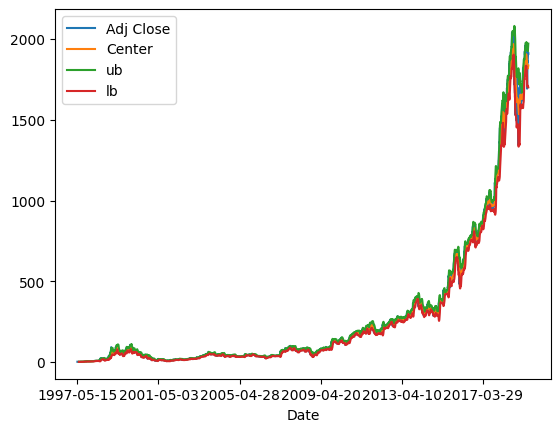

In [13]:
price_df.plot()

In [14]:
#시작시간 생성
start_time = '2010-01-02'
price_df2 = price_df.loc[start_time:]

In [15]:
# 거래내역 파생변수 생성
# 비어있는 값 
price_df2['trade'] = ''  # 아무것도 없으면 주식이 없는 상태
price_df2.head()

C:\Users\ezen\AppData\Local\Temp\ipykernel_7528\97234504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df2['trade'] = ''  # 아무것도 없으면 주식이 없는 상태


,Adj Close,Center,ub,lb,trade
Date,,,,,
2010-01-04,133.899994,133.984001,141.460445,126.507556,
2010-01-05,134.690002,133.839500,141.132776,126.546225,
2010-01-06,132.250000,133.741500,141.066419,126.416581,
2010-01-07,130.000000,133.536000,141.045671,126.026329,
2010-01-08,133.520004,133.646500,141.082939,126.210062,


### 구매내역 추가
- 조건 
  1. 상단 밴드보다 종가가 높은 경우 
     - 현재 구매 상태인 경우(trade = 'buy')
        - 매도 (trade = '')
     - 현재 구매상태가 아닌 경우(trade='')
        - 아무 행동도 하지 않는다(trade='')
  2. 하단 밴드보다 종가가 낮은 경우
     - 현재 구매 상태인 경우(trade = 'buy')
             - 아무 행동도 하지 않는다(trade = 'buy')
     - 현재 구매상태가 아닌 경우(trade='')
        - 매수(trade = 'buy')
  3. 상단밴드와 하단밴드 사이에 종가가 있는 경우
     - 현재 구매 상태인 경우(trade = 'buy')
        - 아무 행동도 하지 않는다(trade = 'buy')
     - 현재 구매상태가 아닌 경우(trade='')
        - 아무 행동도 하지 않는다(trade='')

In [16]:
for i in price_df2.index:
    # 상단 밴드보다 종가가 높은 경우
    if price_df2.loc[i, 'Adj Close'] > price_df2.loc[i, 'ub']:
        # 현재 구매상태인 경우 ( 전 날의 trade = 'buy')
        if price_df2.shift(1).loc[i, 'trade'] == 'buy':
            #매도 
            price_df2.loc[i, 'trade'] = ''
        else:# 구매상태가 아니면 아무것도 하지 않는다.
            price_df2.loc[i, 'trade'] = ''
    # 상단 밴드보다 종가가 높은 경우
    elif price_df2.loc[i, 'Adj Close'] < price_df2.loc[i, 'lb']:
        # 현재 구매상태인 경우 ( 전 날의 trade = 'buy')
        if price_df2.shift(1).loc[i, 'trade'] == 'buy':
            # 보유(현 상태 유지) 
            price_df2.loc[i, 'trade'] = 'buy'
        else: # 구매상태가 아니면 아무것도 하지 않는다.
            price_df2.loc[i, 'trade'] = 'buy'
    # 밴드 안에 종가가 있는 경우
    if price_df2.loc[i, 'Adj Close'] < price_df2.loc[i, 'ub'] and \
       price_df2.loc[i, 'Adj Close'] > price_df2.loc[i, 'lb'] :
        # 현재 구매상태인 경우 ( 전 날의 trade = 'buy')
        if price_df2.shift(1).loc[i, 'trade'] == 'buy':
            # 보유 
            price_df2.loc[i, 'trade'] = 'buy'
        else:# 구매상태가 아니면 아무것도 하지 않는다.
            price_df2.loc[i, 'trade'] = ''


In [17]:
price_df2[price_df2['trade']=='buy']

,Adj Close,Center,ub,lb,trade
Date,,,,,
2010-05-04,129.830002,141.546500,150.652145,132.440855,buy
2010-05-05,130.929993,141.349500,151.203102,131.495898,buy
2010-05-06,128.710007,140.737000,152.099876,129.374125,buy
2010-05-07,124.980003,139.983001,153.358156,126.607845,buy
2010-05-10,131.289993,139.487500,153.396431,125.578570,buy
...,...,...,...,...,...
2019-06-18,1901.369995,1821.456500,1935.384678,1707.528322,buy
2019-06-19,1908.790039,1824.020001,1943.535145,1704.504858,buy
2019-06-20,1918.189941,1826.945495,1952.830613,1701.060378,buy


In [18]:
price_df2['trade'].value_counts()

       1521
buy     863
Name: trade, dtype: int64

In [19]:
# apply를 이용하여 구매 내역 추가 
def bol(x):
    # print(x[0])
    close = x[0]
    ub = x[1]
    lb = x[2]
    trade = price_df2.shift(1)[(price_df2['Adj Close'] == close) & 
                               (price_df2['ub'] == 'ub')  &
                               (price_df2['lb'] == 'lb')]['trade'].values 
    if close > ub: 
        if trade == 'buy':
            return ''
        else:
            return ''
    elif close < lb:
        return 'buy'
    else:
        if trade == 'buy':
            return 'buy'
        else:
            return ''
         

price_df2[['Adj Close', 'ub', 'lb']].apply(bol, axis=1, raw=1).value_counts()

C:\Users\ezen\AppData\Local\Temp\ipykernel_7528\1410721856.py:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if trade == 'buy':
C:\Users\ezen\AppData\Local\Temp\ipykernel_7528\1410721856.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if trade == 'buy':


       2295
buy      89
dtype: int64

### 수익률 계산
- 구매한 날의 종가
   - trade 컬럼에서 전 행의 trade 가 '' 현재 행의 trade가 'buy'인 날의 종가 = 구매 가격
- 판매한 날의 종가
   - 전 행의 trade가 'buy'이고, 현재 행의 trade가 ''인 날의 종가 = 판매 가격
- 수익률 계산
   - (판매가격 - 구매가격) / 구매 가격 +1
- 구매 가격과 판매 가격 초기화
- 여러 개의 수익률 발생
- 누적 수익률
   - 수익을 누적으로 곱


In [20]:
# 손익 계산

price_df2['return'] = 1.0
# 구매가격과 판매가격 변수 생성
buy = 0.0
sell = 0.0

for i in price_df2.index:
    # 구매가격 확인
    if price_df2.shift(1).loc[i,'trade']=='' and \
       price_df2.loc[i,'trade'] =='buy':
        buy = price_df2.loc[i,'Adj Close']
        print('구매일 :', i,'구매가격:', buy)
    # 판매가격 확인
    elif price_df2.shift(1).loc[i,'trade']=='buy' and \
       price_df2.loc[i,'trade'] =='':
        sell = price_df2.loc[i,'Adj Close']
        # 수익률 게산
        rtn = (sell - buy)/buy + 1
        # 수익률을 return 컬럼에 대입
        price_df2.loc[i,'return'] = rtn
        print('판매일 :', i,'판매가격:', sell, '수익률:',round(rtn,4))
    # 구매가격과 판매가격을 초기화
    if price_df2.loc[i,'trade']=='':
        buy = 0.0
        sell = 0.0

C:\Users\ezen\AppData\Local\Temp\ipykernel_7528\475124335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df2['return'] = 1.0


구매일 : 2010-05-04 구매가격: 129.830002
판매일 : 2010-08-04 판매가격: 127.580002 수익률: 0.9827
구매일 : 2010-11-16 구매가격: 157.779999
판매일 : 2010-11-24 판매가격: 177.25 수익률: 1.1234
구매일 : 2011-01-21 구매가격: 177.419998
판매일 : 2011-03-30 판매가격: 179.419998 수익률: 1.0113
구매일 : 2011-06-06 구매가격: 185.690002
판매일 : 2011-06-27 판매가격: 201.25 수익률: 1.0838
구매일 : 2011-08-04 구매가격: 201.479996
판매일 : 2011-10-14 판매가격: 246.710007 수익률: 1.2245
구매일 : 2011-10-26 구매가격: 198.399994
판매일 : 2012-01-18 판매가격: 189.440002 수익률: 0.9548
구매일 : 2012-10-10 구매가격: 244.990005
판매일 : 2012-11-29 판매가격: 251.270004 수익률: 1.0256
구매일 : 2013-04-29 구매가격: 249.740005
판매일 : 2013-06-07 판매가격: 276.869995 수익률: 1.1086
구매일 : 2013-08-14 구매가격: 291.339996
판매일 : 2013-09-18 판매가격: 312.029999 수익률: 1.071
구매일 : 2014-01-24 구매가격: 387.600006
판매일 : 2014-03-05 판매가격: 372.369995 수익률: 0.9607
구매일 : 2014-03-24 구매가격: 351.850006
판매일 : 2014-06-05 판매가격: 323.570007 수익률: 0.9196
구매일 : 2014-09-15 구매가격: 323.890015
판매일 : 2014-11-14 판매가격: 327.820007 수익률: 1.0121
구매일 : 2015-01-15 구매가격: 286.950012
판매일 : 2015-01-3

In [21]:
price_df2.head()

,Adj Close,Center,ub,lb,trade,return
Date,,,,,,
2010-01-04,133.899994,133.984001,141.460445,126.507556,,1.0
2010-01-05,134.690002,133.839500,141.132776,126.546225,,1.0
2010-01-06,132.250000,133.741500,141.066419,126.416581,,1.0
2010-01-07,130.000000,133.536000,141.045671,126.026329,,1.0
2010-01-08,133.520004,133.646500,141.082939,126.210062,,1.0


In [22]:
# 누적 수익률

# 수익률 변수 생성
acc_rtn = 1.0
for i in price_df2.index:
    rtn = price_df2.loc[i,'return']
    #acc_rtn = acc_rtn * rtn
    acc_rtn *= rtn
    price_df2['acc_rtn'] = acc_rtn

print('누적수익률: ', round(acc_rtn,4))


C:\Users\ezen\AppData\Local\Temp\ipykernel_7528\2096150211.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df2['acc_rtn'] = acc_rtn


누적수익률:  3.1381


In [23]:
# 데이터프레임의 첫번째 인덱스 출력
buy = price_df2.iloc[0,0]

In [24]:
# 데이터프레임의 마지막 인덱스 출력
sell =price_df2.iloc[-1,0]

In [25]:
(sell-buy) / buy +1

14.249095911087197

### 블린저 밴드를 함수화
- 1번 함수 생성
  - 매개변수는 데이터프레임, 기준이 되는 컬럼, 시작시간
  - 데이터프레임의 결측치와 이상치를 제거 
  - 기준이 되는 컬럼을 제외하고 나머지 컬럼을 삭제
  - 이동 평균선, 상단밴드, 하단밴드 파생변수 생성
  - 시작시간부텀 마지막 시간까지의 데이터프레임을 필터링 한뒤 데이터프레임을 리턴
- 2번 함수 생성
  - 매개변수 데이터프레임
  - trade 컬럼을 생성 -> ""
  - 구매내역을 trade 컬럼에 대입후 데이터프레임 리턴
- 3번 함수 생성
  - 매개변수 데이터프레임
  - return 컬럼을 생성 -> 1
  - 손익 계산을 하여 return 컬럼에 대입
  - 누적 수익률을 acc_rtn 컬럼을 생성하고 누적수익을 대입
  - 누적 수익률 리턴



In [26]:
# 1번 함수 생성 
def first(_df, _col, _time):
    # 결측치와 이상치를 제거 
    result = _df[~_df.isin([np.nan, np.inf, -np.inf]).any(1)]
    # 기준이 되는 컬럼을 제외한 나머지 컬럼을 삭제
    result = result.loc[:,[_col]]
    # 이동 평균선, 상단밴드, 하단밴드 생성
    result['center'] = result[_col].rolling(20).mean()
    result['ub'] = result['center'] + 2*result[_col].rolling(20).std()
    result['lb'] = result['center'] - 2*result[_col].rolling(20).std()

    # 시작시간부터 마지막 데이터까지 필터링
    result = result.loc[_time:]
    # 결과를 리턴
    return result

In [27]:
df = pd.read_csv('../csv/AAPL.csv', index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0


In [28]:
df = first(df,'Close','2013-01-02')

C:\Users\ezen\AppData\Local\Temp\ipykernel_7528\2002084363.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  result = _df[~_df.isin([np.nan, np.inf, -np.inf]).any(1)]


In [29]:
# 2번 함수
# 거래내역을 추가하는 함수
def second(_df):
    # trade 컬럼을 생성 -> 값은 ""
    result = _df
    result['trade'] = ''
    # 기준이 되는 컬럼의 이름은 가변
    # 위치는 변하지 않기 때문에
    # 기준이 되는 컬럼은 첫번째
    col = result.columns[0]
 
    # trade 내역 추가  
    for i in result.index:
        # 기준이 되는 컬럼이 상단 밴드보다 큰 경우
        if result.loc[i,col] > result.loc[i,'ub']:
            if result.shift(1).loc[i,'trade'] == 'buy':
                result.loc[i,'trade'] = ''
            else:
                result.loc[i,'trade'] = ''
        # 기준이 되는 컬럼이 하단 밴드보다 작은 경우
        elif result.loc[i,col] < result.loc[i,'lb']:
            if result.shift(1).loc[i,'trade'] == 'buy':
                result.loc[i,'trade'] = 'buy'
            else:
                result.loc[i,'trade'] = 'buy'       
        # 기준이 되는 컬럼이 하단 밴드와 상단밴드 사이에 존재하는 경우
        elif result.loc[i,col] >= result.loc[i,'lb'] and \
             result.loc[i,col] <= result.loc[i,'ub']:
                if result.shift(1).loc[i,'trade'] == 'buy':
                    result.loc[i,'trade'] = 'buy'
                else:
                    result.loc[i,'trade'] = ''
    return result         

In [30]:
second(df)['trade'].value_counts()

       933
buy    697
Name: trade, dtype: int64

In [31]:
df = second(df)

In [32]:
# 3번 함수
def third(_df):
    result = _df
    # return 컬럼을 생성 -> 값 1
    result['return'] = 1
    # 기준이 되는 컬럼은 columns[0]
    col = result.columns[0]
    # 수익율, 구매가격, 판매가격 변수 생성
    rtn = 1.0
    buy = 1.0
    sell = 1.0

    # 수익률 계산하는 반복문
    for i in result.index:
        # 구매 가격을 확인
        if result.shift(1).loc[i,'trade'] == '' and\
            result.loc[i,'trade'] == 'buy':
            buy = result.loc[i,col]
            print('구매일자: ', i, '구매가격', buy)
        elif result.shift(1).loc[i,'trade'] == 'buy' and \
            result.loc[i,'trade'] == '':
            sell = result.loc[i, col]
            rtn = (sell - buy) / buy + 1
            result.loc[i, 'return'] = rtn
            print('판매일시:', i, "판매가격:", sell, '수익율: ', round(rtn, 4))

        # buy, sell 값을 초기화
        if result.loc[i, 'trade'] == '':
            buy = 0, 0
            sell = 0, 0
        
    # 누적 수익률 계산
    acc_rtn = 1.0

    for i in result.index:
        rtn = result.loc[i, 'return']
        acc_rtn *= rtn
        result['acc_rtn'] = acc_rtn

    print('누적수익률:', round(acc_rtn, 4))

    return result

In [33]:
third(df)

구매일자:  2013-01-15 구매가격 69.417145
판매일시: 2013-07-29 판매가격: 63.970001 수익율:  0.9215
구매일자:  2013-09-11 구매가격 66.815712
판매일시: 2013-10-18 판매가격: 72.69857 수익율:  1.088
구매일자:  2014-01-03 구매가격 77.28286
판매일시: 2014-03-25 판매가격: 77.855713 수익율:  1.0074
구매일자:  2014-10-15 구매가격 97.540001
판매일시: 2014-10-23 판매가격: 104.830002 수익율:  1.0747
구매일자:  2014-12-12 구매가격 109.730003
판매일시: 2015-01-28 판매가격: 115.309998 수익율:  1.0509
구매일자:  2015-03-11 구매가격 122.239998
판매일시: 2015-04-23 판매가격: 129.669998 수익율:  1.0608
구매일자:  2015-06-29 구매가격 124.529999
판매일시: 2015-07-20 판매가격: 132.070007 수익율:  1.0605
구매일자:  2015-08-04 구매가격 114.639999
판매일시: 2015-10-22 판매가격: 115.5 수익율:  1.0075
구매일자:  2015-12-14 구매가격 112.480003
판매일시: 2016-03-01 판매가격: 100.529999 수익율:  0.8938
구매일자:  2016-04-27 구매가격 97.82
판매일시: 2016-05-25 판매가격: 99.620003 수익율:  1.0184
구매일자:  2016-06-20 구매가격 95.099998
판매일시: 2016-07-18 판매가격: 99.830002 수익율:  1.0497
구매일자:  2016-09-09 구매가격 103.129997
판매일시: 2016-09-14 판매가격: 111.769997 수익율:  1.0838
구매일자:  2016-11-01 구매가격 111.489998
판매일시: 2016-12-13 

,Close,center,ub,lb,trade,return,acc_rtn
Date,,,,,,,
2013-01-02,78.432854,75.742428,80.299680,71.185175,,1.0,1.355366
2013-01-03,77.442856,75.501356,78.991046,72.011667,,1.0,1.355366
2013-01-04,75.285713,75.417142,78.838220,71.996064,,1.0,1.355366
2013-01-07,74.842857,75.250428,78.420993,72.079863,,1.0,1.355366
2013-01-08,75.044289,75.193714,78.334816,72.052611,,1.0,1.355366
...,...,...,...,...,...,...,...
2019-06-18,198.449997,185.432500,201.032574,169.832427,buy,1.0,1.355366
2019-06-19,197.869995,185.996000,202.558154,169.433846,buy,1.0,1.355366
2019-06-20,199.460007,186.830000,204.361771,169.298229,buy,1.0,1.355366


In [39]:
import bollinger as bb
import imp
imp.reload(bb)

<module 'bollinger' from 'c:\\Users\\ezen\\Documents\\GitHub\\python_ezen\\230318\\bollinger\\__init__.py'>

In [40]:
df = pd.read_csv('../csv/BND.csv', index_col='Date')
df.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-04-10,75.07,75.260002,75.0,75.239998,51.523693,35000


In [41]:
df = bb.first(df,'Adj Close', '2011-01-01')
df.head()

c:\Users\ezen\Documents\GitHub\python_ezen\230318\bollinger\__init__.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  result = _df[~_df.isin([np.nan, np.inf, -np.inf]).any(1)]


,Adj Close,center,ub,lb
Date,,,,
2011-01-03,64.215347,64.013149,64.616070,63.410227
2011-01-04,64.223389,63.983159,64.463678,63.502641
2011-01-05,63.943043,63.962609,64.410380,63.514838
2011-01-06,63.999104,63.961561,64.408864,63.514259
2011-01-07,64.239395,63.969743,64.431591,63.507896


In [43]:
df = bb.second(df)
df.head()

,Adj Close,center,ub,lb,trade
Date,,,,,
2011-01-03,64.215347,64.013149,64.616070,63.410227,
2011-01-04,64.223389,63.983159,64.463678,63.502641,
2011-01-05,63.943043,63.962609,64.410380,63.514838,
2011-01-06,63.999104,63.961561,64.408864,63.514259,
2011-01-07,64.239395,63.969743,64.431591,63.507896,


In [44]:
bb.third(df)

구매일자:  2011-02-03 구매가격 63.937851
판매일시: 2011-03-16 판매가격: 65.105652 수익율:  1.0183
구매일자:  2011-06-29 구매가격 66.049957
판매일시: 2011-08-01 판매가격: 67.197464 수익율:  1.0174
구매일자:  2011-11-30 구매가격 68.584297
판매일시: 2011-12-13 판매가격: 69.032143 수익율:  1.0065
구매일자:  2012-03-14 구매가격 69.140411
판매일시: 2012-04-10 판매가격: 70.015167 수익율:  1.0127
구매일자:  2012-08-15 구매가격 71.121567
판매일시: 2013-02-25 판매가격: 71.270378 수익율:  1.0021
구매일자:  2013-05-10 구매가격 71.452927
판매일시: 2013-09-18 판매가격: 69.627502 수익율:  0.9745
구매일자:  2013-12-24 구매가격 69.648918
판매일시: 2014-02-03 판매가격: 70.937912 수익율:  1.0185
구매일자:  2014-09-10 구매가격 72.17923
판매일시: 2014-10-01 판매가격: 72.65773 수익율:  1.0066
구매일자:  2015-02-17 구매가격 73.605263
판매일시: 2015-03-18 판매가격: 74.53598 수익율:  1.0126
구매일자:  2015-04-28 구매가격 74.316902
판매일시: 2015-07-08 판매가격: 73.50975 수익율:  0.9891
구매일자:  2015-10-29 구매가격 73.890236
판매일시: 2015-12-01 판매가격: 74.04142 수익율:  1.002
구매일자:  2016-09-09 구매가격 77.30217
판매일시: 2017-01-05 판매가격: 75.613007 수익율:  0.9781
구매일자:  2017-03-08 구매가격 75.011765
판매일시: 2017-04-13 판매가격: 76.

,Adj Close,center,ub,lb,trade,return,acc_rtn
Date,,,,,,,
2011-01-03,64.215347,64.013149,64.616070,63.410227,,1.0,1.06549
2011-01-04,64.223389,63.983159,64.463678,63.502641,,1.0,1.06549
2011-01-05,63.943043,63.962609,64.410380,63.514838,,1.0,1.06549
2011-01-06,63.999104,63.961561,64.408864,63.514259,,1.0,1.06549
2011-01-07,64.239395,63.969743,64.431591,63.507896,,1.0,1.06549
...,...,...,...,...,...,...,...
2019-06-18,82.397118,81.737070,82.743959,80.730181,,1.0,1.06549
2019-06-19,82.676468,81.836350,82.799510,80.873191,,1.0,1.06549
2019-06-20,82.806168,81.934650,82.870640,80.998661,,1.0,1.06549
